In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo.lib import DB
from demo import SeedZoneObserver, CoordGenerator
from IPython.display import clear_output

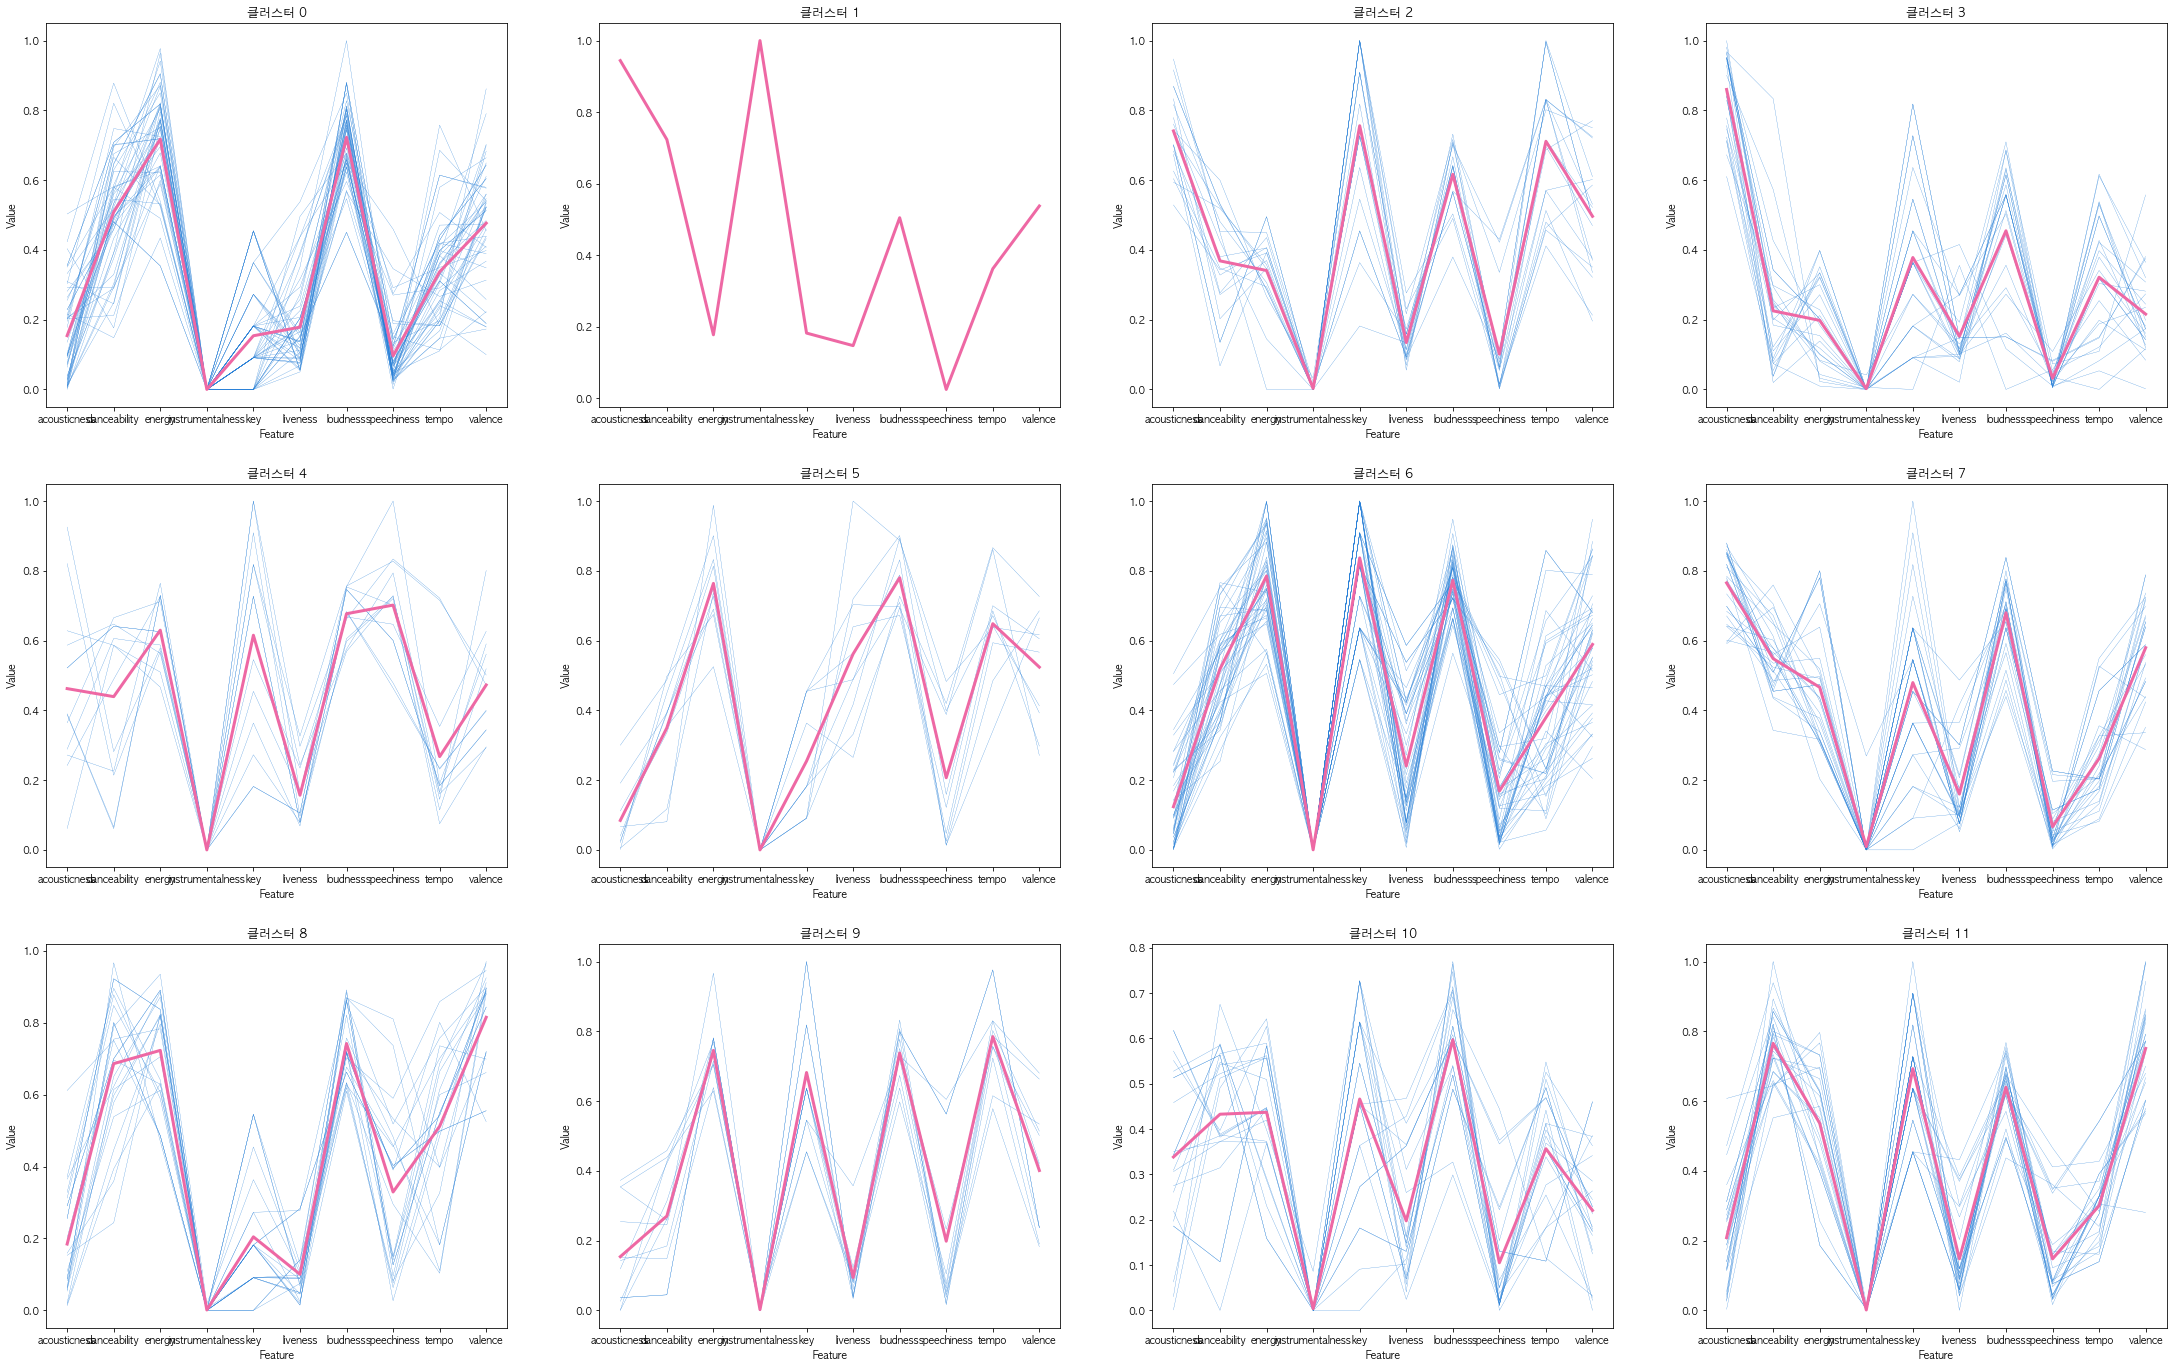

In [8]:
observer = SeedZoneObserver()
observer.run()

clear_output(wait=True)
observer.kmeans.draw_cluster()

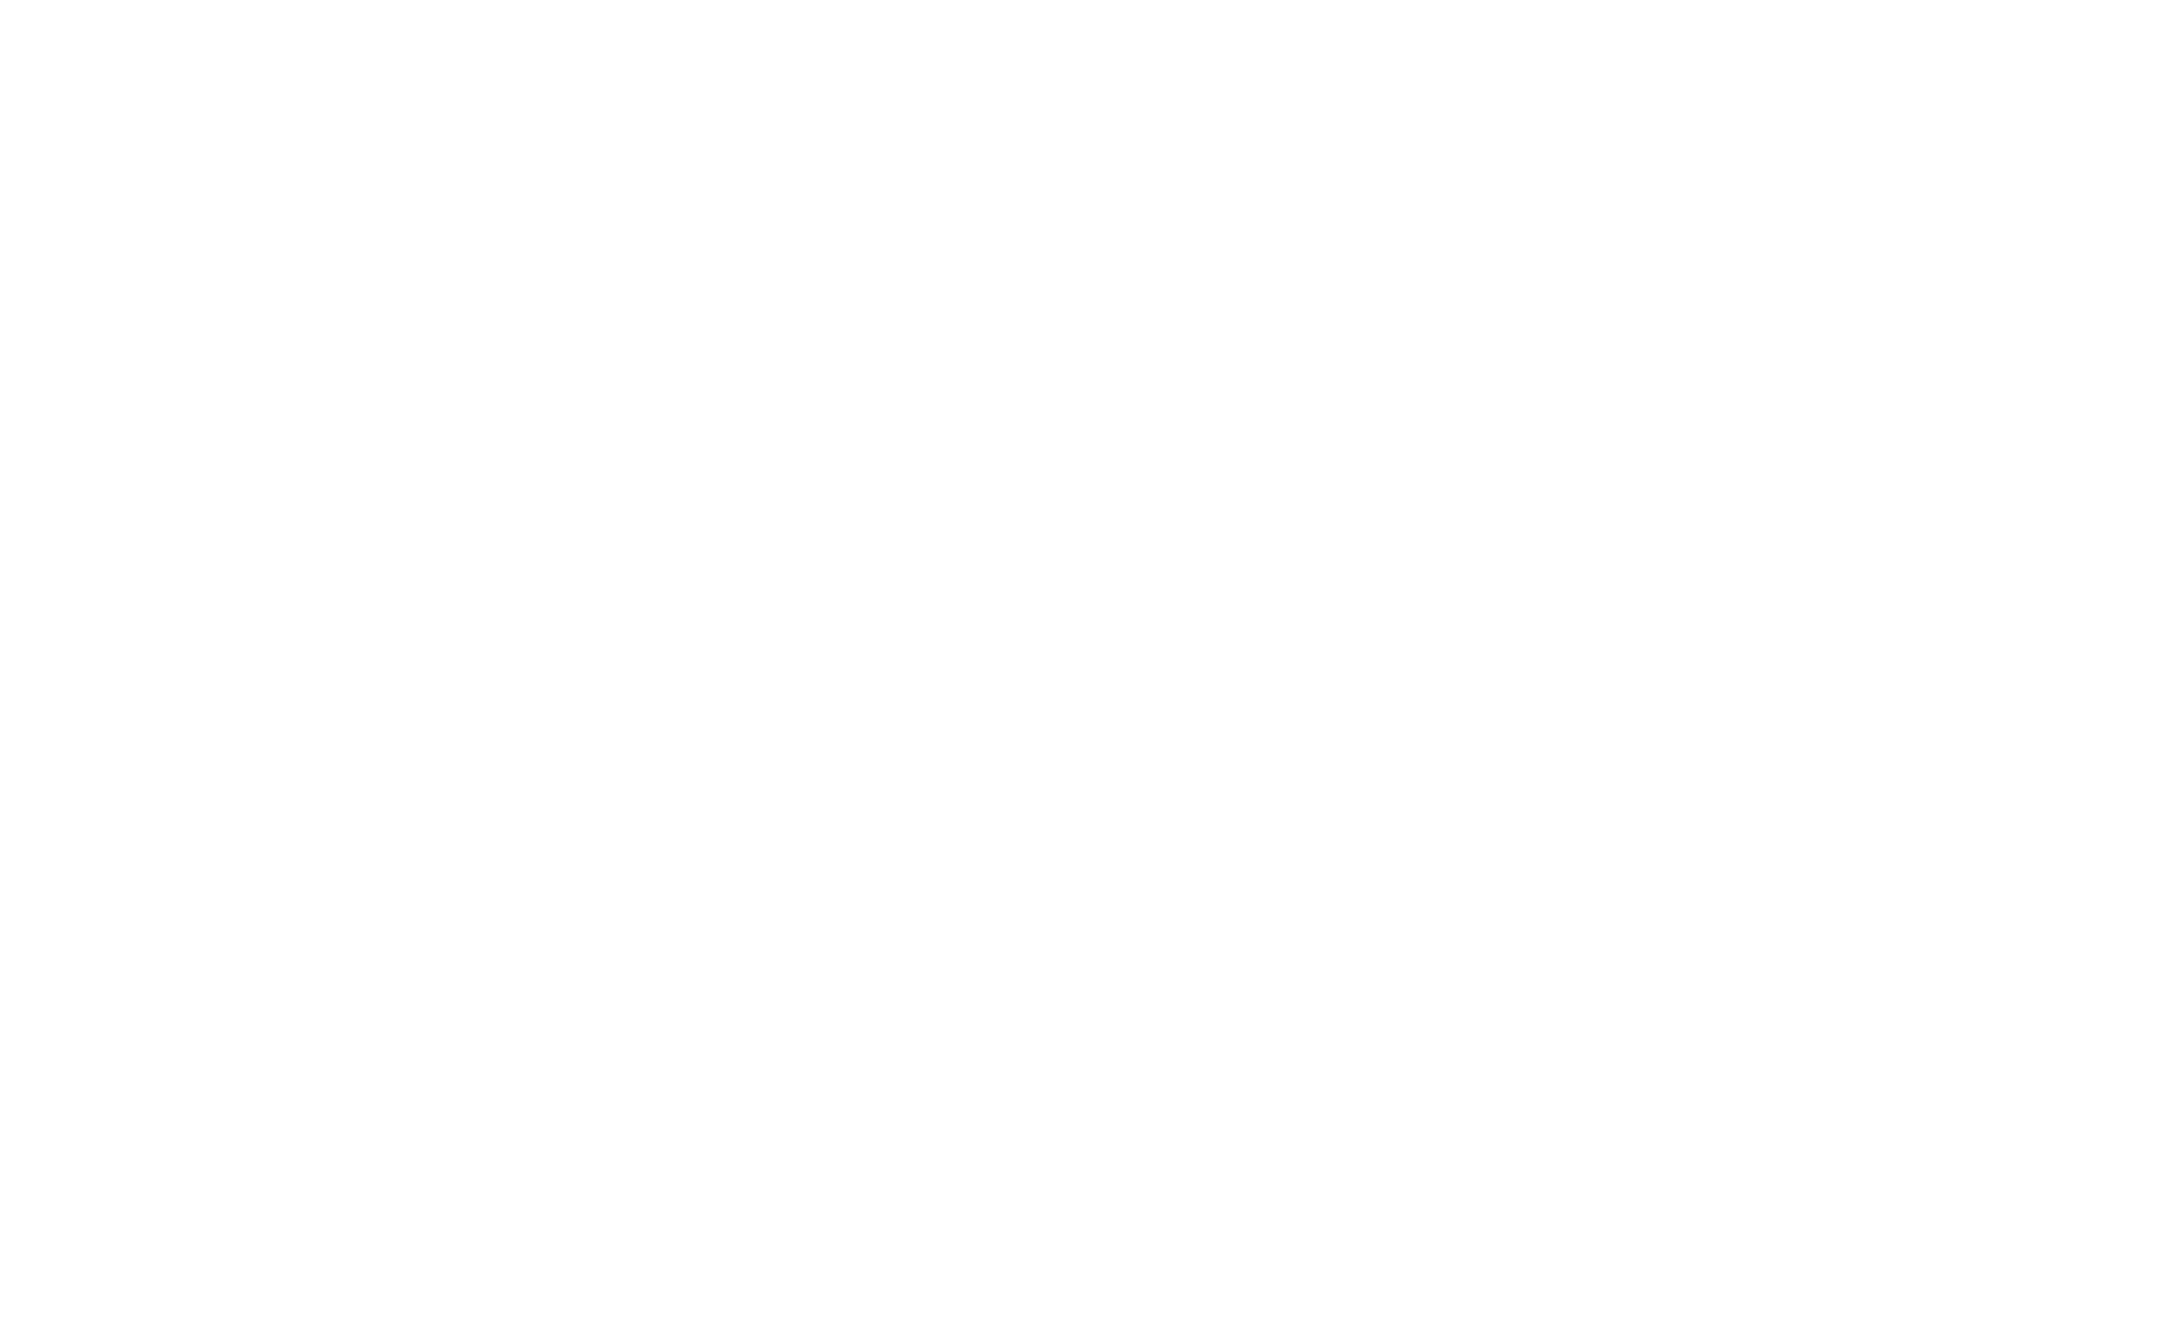

In [9]:
observer.kmeans.save_draw_cluster()

In [11]:
observer.kmeans.sorting()

[10.  0.  8. 11.  6.  9.  5.  4.  1.  3.  2.  7.]
sorting okay :)


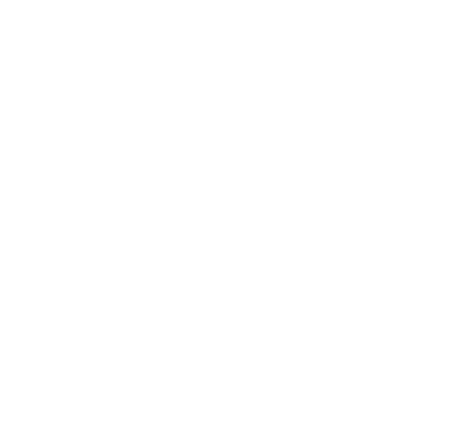

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import pi

num_labels = observer.kmeans.K
angles = [x/float(num_labels)*(2*pi)
                  for x in range(num_labels)]
angles += angles[:1]

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(16,6))

# Radar : Before Coords
ax = plt.subplot(1,1,1,polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.tick_params(axis='x', which='major', pad=30)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1], ["클러스터 {}".format(_) if np.isin(_,[10, 0, 7, 8, 2]) else "" for _ in np.array([10.,  0.,  8., 11.,  6.,  9.,  5.,  4.,  1.,  3.,  2.,  7.,]).astype("int")])

ax.grid(False)
ax.patch.set_visible(False)
ax.spines["polar"].set_color("white")
# ax.yaxis.set_visible(False)

# ax.yaxis.grid(False)
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.yticks(range(0, 101, 25), range(0, 101, 25), fontsize=10)
plt.ylim(0, 100)

plt.savefig("./visual_images/polar_1.png", transparent=True)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from math import pi

num_labels = gen.K
angles = [x/float(num_labels)*(2*pi)
                  for x in range(num_labels)]
angles += angles[:1]
data = np.append(gen.label_percentages_, gen.label_percentages_[0])

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(16,6))

# Radar : Before Coords
ax = plt.subplot(1,2,1,polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.tick_params(axis='x', which='major', pad=30)
ax.set_rlabel_position(0)

ax.plot(angles, data, color="#EE68A4")
ax.fill(angles, data, color='#AC73CF')

plt.xticks(angles[:-1], ["클러스터 {}".format(_) for _ in range(0, gen.K)])
plt.yticks(range(0, 101, 25), range(0, 101, 25), fontsize=10)
plt.ylim(0, 100)
plt.title("Radar : Before Coords")

# Quadrant : After Coords
ax = plt.subplot(1,2,2)
data = gen.point

plt.axvline(0, color="#333", linewidth=1)
plt.axhline(0, color="#333", linewidth=1)

plt.scatter(data['x'], data['y'], color='#AC73CF', s=300, marker='v')

plt.ylim(-100, 100)
plt.xlim(-100, 100)
plt.title("Quadrant : After Coords", pad=50)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()